#Using Tabula Sapiens as a reference for annotating new datasets
This notebook allows you to annotate your data with a number of annotation methods using the Tabula Sapiens dataset as the reference. 

Initial setup: 
1. Make sure GPU is enabled (Runtime -> Change Runtime Type -> Hardware Accelerator -> GPU)
2. We also highly recommend getting Colab PRO for access to a high ram session.


Integration Methods Provided:
- scVI [(Lopez et al. 2018)](https://www.nature.com/articles/s41592-018-0229-2)
- bbKNN [(Polański et al. 2020)](https://academic.oup.com/bioinformatics/article/36/3/964/5545955)
- Scanorama [(He et al. 2019)](https://www.nature.com/articles/s41587-019-0113-3)

Annotation Methods:
- KNN on integrated spaces
- scANVI [(Xu et al. 2021)](https://www.embopress.org/doi/full/10.15252/msb.20209620)
- onClass [(Wang et al. 2020)](https://www.biorxiv.org/content/10.1101/810234v2)
- SVM 
- RandomForest

To use the notebook, simply connect to your Google Drive account, set the necessary arguments, select your methods, and run all the code blocks!

**User action is only required in Steps 1-3.**

Last edited: 6/27/2021



## Step 1: Setup environment

In [ ]:
!git clone https://github.com/czbiohub/PopV.git

!pip install --quiet git+https://github.com/czbiohub/PopV
!pip install scanpy

Cloning into 'PopV'...
remote: Enumerating objects: 202, done.
remote: Counting objects: 100% (202/202), done.
remote: Compressing objects: 100% (135/135), done.
remote: Total 202 (delta 98), reused 161 (delta 60), pack-reused 0
Receiving objects: 100% (202/202), 38.26 MiB | 13.70 MiB/s, done.
Resolving deltas: 100% (98/98), done.
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 97 kB 1.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 14.5 MB 21.2 MB/s 
     |████████████████████████████████| 793 kB 72.6 MB/s 
     |████████████████████████████████| 232 kB 78.5 MB/s 
     |████████████████████████████████| 3.0 MB 57.3 MB/s 
     |████████████████████████████████| 516.2 MB 3.7 kB/s 
     |████████████████████████████████| 262 kB 75.3 MB/s 
     |███

# Restart the Runtime after installation (User Action Required)

Runtime -> "Restart runtime"

In [ ]:
# Restart the runtime before running this cell
import anndata
import popv
import numpy as np
import scanpy as sc

Global seed set to 0


Instructions for updating:
non-resource variables are not supported in the long term


/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


# Step 2: Load your data (User Action Required)
Here we provide three options to load your data:
1. Connect to Google Drive (highly recommended)
2. Download your data from the cloud and save into this session or on Google drive.
3. Upload your data manually into this session (files are not persistent and will be deleted when session is closed)

As an example, we use a subsampled version of the [Lung Cell Atlas](https://hlca.ds.czbiohub.org/) \[1] for our query data.

\[1] Travaglini, K. et al. A molecular cell atlas of the human lung from single-cell RNA sequencing. *Nature* **587**, 619–625(2020).

In [ ]:
# OPTION 1: Connect to Google Drive
# This is the recomended method especially for large datasets
from google.colab import drive    
drive.mount('/content/drive')
query_adata = anndata.read('/path/to/your/anndata')

In [ ]:
# OPTION 2: Downloading from the cloud (Dropbox, AWS, Google Drive, etc)
# Google Colab supports wget, curl, and gdown commands
# It is recommended to download the data into Google Drive and read from there.
# This way your data will be persistent.
!wget <YOUR URL>
query_adata = anndata.read('/path/to/your/anndata')

In [ ]:
# OPTION 3: Uploading data manually
# Click the folder icon on the left navigation bar, and select the upload icon
# Note: Manually uploaded data is automatically deleted when the colab session ends
# This is not recommended if your dataset is very large
query_adata = anndata.read('/path/to/your/anndata')

In [ ]:
# EXAMPLE: Download an example dataset
! wget -O LCA.h5ad https://www.dropbox.com/s/mrf8y7emfupo4he/LCA.h5ad?dl=1
query_adata = anndata.read('LCA.h5ad')
query_adata.obs_names_make_unique()
query_adata.var_names = query_adata.var_names.str.upper()



--2022-06-27 22:16:24--  https://www.dropbox.com/s/mrf8y7emfupo4he/LCA.h5ad?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.85.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.85.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/mrf8y7emfupo4he/LCA.h5ad [following]
--2022-06-27 22:16:25--  https://www.dropbox.com/s/dl/mrf8y7emfupo4he/LCA.h5ad
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc5fd64b5049fd09bc9fec2d4859.dl.dropboxusercontent.com/cd/0/get/BoCY2u5QNivr_1gvs55T4CgW89AaOTvHTRqZsBs8A9YojJ1F97AkhDr-hs7sgusbNJWolkAlj01KftQKX8692XkME8ZtwTFH7EgiZA5hFoKHNmRcWTbTHR-vXczNNNl4d3Va8j9orElo4nWMjvvYrrJg5hA2GXgV28luIHDG5eC_v41ZTOFNuaGx3Zy3ToeKEdE/file?dl=1# [following]
--2022-06-27 22:16:25--  https://uc5fd64b5049fd09bc9fec2d4859.dl.dropboxusercontent.com/cd/0/get/BoCY2u5QNivr_1gvs55T4CgW89AaOTvHTRqZsBs8A9YojJ1F97AkhD

In [ ]:
query_adata

AnnData object with n_obs × n_vars = 75071 × 23681
    obs: 'method', 'donor', 'cell_ontology_type', 'donor_method', 'cell_ontology_id'

### Check that query_adata.X contains raw_counts

In [ ]:
from popv import _check_nonnegative_integers
assert _check_nonnegative_integers(query_adata.X) == True, 'Make sure query_adata.X contains raw_counts'

# Step 3 (User Action Required): Setting Up Annotation Parameters 

Here is where you set the parameters for the automated annotation.

Arguments:
- **tissue:** Tabula Sapiens tissue to annotate your data with. Available tissues: ["Bladder", "Blood", "Bone_Marrow", "Kidney", "Large_Intestine", "Lung","Lymph_Node", "Pancreas", "Small_Intestine", "Spleen", "Thymus","Trachea", "Vasculature"]
- **save_location:** location to save results to. By default will save to a folder named `annotation_results`. It is highly recommended you provide a Google Drive folder here.
- **query_batch_key:** key in `query_adata.obs` for batch correction. Set to None for no batch correction. 
- **methods:** these are the methods to run. By default, will run all methods.


Lesser used parameters
- **query_labels_key**: scANVI has the option to use labeled cells in the query dataset during training. To use some prelabeled cells from the query dataset, set `query_labels_key` to the corresponding key in `query_adata.obs`
- **unknown_celltype_label**: If `query_labels_key` is not None, will treat everything not labeled `unknown_celltype_label` as a labeled cell

In [ ]:
""" 
tissue options: 
['Bladder','Blood','Bone_Marrow','Fat',
'Heart','Kidney','Large_Intestine','Liver',
'Lung','Lymph_Node','Mammary','Muscle',
'Pancreas','Prostate','Salivary Gland',
'Skin','Small_Intestine','Spleen',
'Thymus','Trachea','Vasculature']
"""
tissue = 'Lung'
save_folder = 'popv_results'

query_batch_key = 'method'
methods = ['bbknn','scvi', 'scanvi', 'svm', 'rf', 'onclass', 'scanorama']

# Lesser used parameters
query_labels_key=None
unknown_celltype_label='unknown'

# Step 4: Downloading Reference Data and Pretrained Models
No more user input required! Just run all the following code blocks.

**NOTE: PopV has only been evaluated with the Lung as a reference dataset. Other tissue results may vary depending on annotation quality**

In [ ]:
# Here we download the necessary data:

if tissue == 'Bladder':
  refdata_url ='https://www.dropbox.com/s/p5x1lb0jyl8293c/Bladder.h5ad?dl=1'
elif tissue == 'Blood':
  refdata_url = 'https://www.dropbox.com/s/4cg6zj340oelhlg/Blood.h5ad?dl=1'
elif tissue == 'Bone_Marrow':
  refdata_url = 'https://www.dropbox.com/s/rwfovoyafpd64io/Bone_Marrow.h5ad?dl=1'
elif tissue == 'Fat':
  refdata_url = 'https://www.dropbox.com/s/if1d7iloovi8e9o/Fat.h5ad?dl=1'
elif tissue == 'Heart':
  refdata_url = 'https://www.dropbox.com/s/0udrdzjl2z087jj/Heart.h5ad?dl=1'
elif tissue == 'Kidney':
  refdata_url = 'https://www.dropbox.com/s/8sx9fhjfgnyjgdz/Kidney.h5ad?dl=1'
elif tissue == 'Large_Intestine':
  refdata_url = 'https://www.dropbox.com/s/272sajn0hkj62le/Large_Intestine.h5ad?dl=1'
elif tissue == 'Liver':
  refdata_url = 'https://www.dropbox.com/s/g0ahumalnm0mp38/Liver.h5ad?dl=1'
elif tissue == 'Lung':
  refdata_url = 'https://www.dropbox.com/s/2kuzdamjevev2ci/Lung.h5ad?dl=1'
elif tissue == 'Lymph_Node':
  refdata_url = 'https://www.dropbox.com/s/tetuh62010uothb/Lymph_Node.h5ad?dl=1'
elif tissue == 'Mammary':
  refdata_url = 'https://www.dropbox.com/s/krm4pv4ev6cynns/Mammary.h5ad?dl=1'
elif tissue == 'Muscle':
  refdata_url = 'https://www.dropbox.com/s/0jhvnoy49rvrlqn/Muscle.h5ad?dl=1'
elif tissue == 'Pancreas':
  refdata_url = 'https://www.dropbox.com/s/kn0zodnmxwx0yhe/Pancreas.h5ad?dl=1'
elif tissue == 'Prostate':
  refdata_url = 'https://www.dropbox.com/s/040fb5jr0zcur7h/Prostate.h5ad?dl=1'
elif tissue == 'Salivary Gland':
  refdata_url = 'https://www.dropbox.com/s/rwia1ji7eztga6b/Salivary_Gland.h5ad?dl=1'
elif tissue == 'Skin':  
  refdata_url = 'https://www.dropbox.com/s/ucvdksq2jnug2nh/Skin.h5ad?dl=1'
elif tissue == 'Small_Intestine':
  refdata_url = 'https://www.dropbox.com/s/06ia5n2yex3dq8j/Small_Intestine.h5ad?dl=1'
elif tissue == 'Spleen':
  refdata_url = 'https://www.dropbox.com/s/m2d0gme847qdhr1/Spleen.h5ad?dl=1'
elif tissue == 'Thymus':
  refdata_url = 'https://www.dropbox.com/s/i84bcyk87scesml/Thymus.h5ad?dl=1'
elif tissue == 'Trachea':
  refdata_url = 'https://www.dropbox.com/s/ppt7b6w73gvceap/Trachea.h5ad?dl=1'
elif tissue == 'Vasculature':
  refdata_url = 'https://www.dropbox.com/s/1eq0zamel5etmoq/Vasculature.h5ad?dl=1'

# Download reference dataset
output_fn = 'TS_{}.h5ad'.format(tissue)
!wget -O $output_fn $refdata_url

--2022-06-27 22:17:10--  https://www.dropbox.com/s/2kuzdamjevev2ci/Lung.h5ad?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.85.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.85.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/2kuzdamjevev2ci/Lung.h5ad [following]
--2022-06-27 22:17:10--  https://www.dropbox.com/s/dl/2kuzdamjevev2ci/Lung.h5ad
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc331067f86ee131d71bd2920b87.dl.dropboxusercontent.com/cd/0/get/BoD6--fBLUos7XHl4od1qKk890uFg-ZK0d55Y_05exUPifJsCBLFVNqxo2h5574seFYPmYzY3JrQneMsjfEFJEXAmGgV4HUFUPqSwwbBui47tWYqnZ5CfuYRXsihd8ZzDYn1ANoMMKHw5X0JGlPQ3Dr7mDIz6pYwXLjlIv3FYzyp9q-dKD0NGEe413z0oxU3NCg/file?dl=1# [following]
--2022-06-27 22:17:11--  https://uc331067f86ee131d71bd2920b87.dl.dropboxusercontent.com/cd/0/get/BoD6--fBLUos7XHl4od1qKk890uFg-ZK0d55Y_05exUPifJsCBL

In [ ]:
# read in the reference dataset
ref_adata_path = 'TS_{}.h5ad'.format(tissue)
ref_adata = anndata.read(ref_adata_path)

### Setup reference data

In [ ]:
assert _check_nonnegative_integers(ref_adata.X) == True, 'Make sure ref_adata.X contains raw_counts'

In [ ]:
# Following parameters are specific to Tabula Sapiens dataset
ref_labels_key='cell_ontology_class'
ref_batch_key = ['donor', 'method']

In [ ]:
min_celltype_size = np.min(ref_adata.obs.groupby('cell_ontology_class').size())
n_samples_per_label = np.max((min_celltype_size, 100))

### Preprocess query with ref dataset


In [ ]:
from popv import process_query

adata = process_query(query_adata,
                      ref_adata,
                      save_folder=save_folder,
                      query_batch_key=query_batch_key,
                      query_labels_key=query_labels_key,
                      unknown_celltype_label=unknown_celltype_label,
                      pretrained_scvi_path=None,
                      ref_labels_key=ref_labels_key, 
                      ref_batch_key=ref_batch_key,
                      n_samples_per_label=n_samples_per_label)

Sampling 100 per label


/usr/local/lib/python3.7/dist-packages/anndata/_core/merge.py:918: UserWarning: Only some AnnData objects have `.raw` attribute, not concatenating `.raw` attributes.
  UserWarning,


# Step 5: Run Automated Cell Annotation Methods
No user action required. 

Your results will be saved to the folder you provided as **save_folder**.


`predictions.csv` csv contains all the predictions from PopV. 
- The column `popv_prediction` contains the end popv prediction. 
- `popv_prediction_score` contains the score for the popv_prediction, which is a measure of the number of methods that agreed with the resulting prediction. We use the cell ontology when aggregating results.
- We also include the majority vote, which simply takes the celltype that was most often predicted by the individual methods.

`scanvi_latent.csv` contains the latent space after training with scanvi for both reference and query cells. 

`scvi_latent.csv` contains the latent space after training with scvi for both reference and query cells. 

In [ ]:
popv.annotate_data(adata,
              methods, 
              save_folder,
              pretrained_scvi_path=None, 
              pretrained_scanvi_path=None,
              onclass_ontology_file="PopV/ontology/cl.ontology",
              onclass_obo_fp="PopV/ontology/cl.obo",
              onclass_emb_fp="PopV/ontology/cl.ontology.nlp.emb",
             )

Integrating data with bbknn.
Classifying with knn on bbknn distances.


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py:176: EfficiencyWarning: Precomputed sparse input was not sorted by data.
  EfficiencyWarning)
/usr/local/lib/python3.7/dist-packages/popv/methods.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs[result_key][query_idx] = knn_pred
INFO:absl:Unable to initialize backend 'tpu_driver': NOT_FOUND: Unable to find driver in registry given worker: 


Saved knn on bbknn results to adata.obs["popv_knn_on_bbknn_prediction"]
Running scvi.


INFO:absl:Unable to initialize backend 'tpu': INVALID_ARGUMENT: TpuPlatform is not available.


Training scvi offline.


/usr/local/lib/python3.7/dist-packages/torchmetrics/utilities/prints.py:36: UserWarning: Torchmetrics v0.9 introduced a new argument class property called `full_state_update` that has
                not been set for this class (ElboMetric). The property determines if `update` by
                default needs access to the full metric state. If this is not the case, significant speedups can be
                achieved and we recommend setting this to `False`.
                We provide an checking function
                `from torchmetrics.utilities import check_forward_no_full_state`
                that can be used to check if the `full_state_update=True` (old and potential slower behaviour,
                default for now) or if `full_state_update=False` can be used safely.
                
  warnings.warn(*args, **kwargs)
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 1/1:   0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/scvi/distributions/_negative_binomial.py:63: UserWarning: Specified kernel cache directory could not be created! This disables kernel caching. Specified directory is /root/.cache/torch/kernels. This warning will appear only once per process. (Triggered internally at  ../aten/src/ATen/native/cuda/jit_utils.cpp:860.)
  - torch.lgamma(x + 1)


Epoch 1/1: 100%|██████████| 1/1 [00:07<00:00,  7.43s/it, loss=935, v_num=1]
Classifying with knn on scVI latent space.
Training knn on scvi latent space. Using latent space in adata.obsm["X_scvi_offline"]


/usr/local/lib/python3.7/dist-packages/popv/methods.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs[result_key][query_idx] = knn_pred


Running scANVI.
INFO     Training for 1 epochs.                                                              


/usr/local/lib/python3.7/dist-packages/torchmetrics/utilities/prints.py:36: UserWarning: Torchmetrics v0.9 introduced a new argument class property called `full_state_update` that has
                not been set for this class (ElboMetric). The property determines if `update` by
                default needs access to the full metric state. If this is not the case, significant speedups can be
                achieved and we recommend setting this to `False`.
                We provide an checking function
                `from torchmetrics.utilities import check_forward_no_full_state`
                that can be used to check if the `full_state_update=True` (old and potential slower behaviour,
                default for now) or if `full_state_update=False` can be used safely.
                
  warnings.warn(*args, **kwargs)
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 1/1: 100%|██████████| 1/1 [00:10<00:00, 10.71s/it, loss=1.09e+03, v_num=1]
Classifying with SVM.


/usr/local/lib/python3.7/dist-packages/popv/methods.py:199: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs[save_key][test_idx] = svm_pred


Classifying with random forest.
Training random forest classifier with 2966 cells


/usr/local/lib/python3.7/dist-packages/popv/methods.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs[save_key][test_idx] = rf_pred


Classifying with onclass.
Training cost after epoch 1: loss:4.959422 acc: 0.964 auc: 1.000 auprc: 0.969


/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1114: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


Training cost after epoch 2: loss:2.155558 acc: 0.983 auc: 1.000 auprc: 0.997


/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1114: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


Training cost after epoch 3: loss:1.344836 acc: 0.989 auc: 1.000 auprc: 1.000


/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1114: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


Training cost after epoch 4: loss:0.924214 acc: 0.993 auc: 1.000 auprc: 1.000


/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1114: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


Training cost after epoch 5: loss:0.658907 acc: 0.997 auc: 1.000 auprc: 1.000


/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1114: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


Training cost after epoch 6: loss:0.487754 acc: 0.995 auc: 1.000 auprc: 1.000


/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1114: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


Training cost after epoch 7: loss:0.374106 acc: 0.997 auc: 1.000 auprc: 1.000


/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1114: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


Training cost after epoch 8: loss:0.300181 acc: 0.996 auc: 1.000 auprc: 1.000


/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1114: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


Training cost after epoch 9: loss:0.253643 acc: 0.998 auc: 1.000 auprc: 1.000


/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1114: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


Training cost after epoch 10: loss:0.221798 acc: 0.997 auc: 1.000 auprc: 1.000


/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1114: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


Training cost after epoch 11: loss:0.196421 acc: 0.998 auc: 1.000 auprc: 1.000


/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1114: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


Training cost after epoch 12: loss:0.179847 acc: 0.996 auc: 1.000 auprc: 1.000


/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1114: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


Training cost after epoch 13: loss:0.168716 acc: 0.998 auc: 1.000 auprc: 1.000


/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1114: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


Training cost after epoch 14: loss:0.161271 acc: 0.996 auc: 1.000 auprc: 1.000


/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1114: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


Training cost after epoch 15: loss:0.156539 acc: 0.996 auc: 1.000 auprc: 1.000


/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1114: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


Training cost after epoch 16: loss:0.153530 acc: 0.995 auc: 1.000 auprc: 1.000


/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1114: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


Training cost after epoch 17: loss:0.150498 acc: 0.997 auc: 1.000 auprc: 1.000


/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1114: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


Training cost after epoch 18: loss:0.144823 acc: 0.997 auc: 1.000 auprc: 1.000


/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1114: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


Training cost after epoch 19: loss:0.143588 acc: 0.996 auc: 1.000 auprc: 1.000


/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1114: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


Training cost after epoch 20: loss:0.142251 acc: 0.996 auc: 1.000 auprc: 1.000


/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1114: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)
Trying to set attribute `.obs` of view, copying.
/usr/local/lib/python3.7/dist-packages/popv/methods.py:167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_adata.obs[save_key][i : i + shard_size] = pred_label_str
/usr/local/lib/python3.7/dist-packages/popv/methods.py:167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_adata.obs[save_key][i : i + shard_size] = pred_label_str
/usr/local/lib/python3.7/dist-packages/popv/methods.py:175: SettingWithCopyWarning: 
A value 

Running scanorama.
Found 4000 genes among all datasets
[[0.         0.40882565 0.14298851 0.76197388 0.26426043 0.22752497
  0.71431608]
 [0.         0.         0.14183908 0.52830189 0.2876458  0.26193119
  0.15081305]
 [0.         0.         0.         0.02177068 0.25356322 0.04661487
  0.0691954 ]
 [0.         0.         0.         0.         0.19013062 0.23307436
  0.62409289]
 [0.         0.         0.         0.         0.         0.65926748
  0.16633011]
 [0.         0.         0.         0.         0.         0.
  0.41065483]
 [0.         0.         0.         0.         0.         0.
  0.        ]]
Processing datasets (0, 3)
Processing datasets (0, 6)
Processing datasets (4, 5)
Processing datasets (3, 6)
Processing datasets (1, 3)
Processing datasets (5, 6)
Processing datasets (0, 1)
Processing datasets (1, 4)
Processing datasets (0, 4)
Processing datasets (1, 5)
Processing datasets (2, 4)
Processing datasets (3, 5)
Processing datasets (0, 5)
Processing datasets (3, 4)
Processi

/usr/local/lib/python3.7/dist-packages/popv/methods.py:323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs[result_key][query_idx] = knn_pred


Predictions saved to popv_results/predictions.csv


In [ ]:
adata

AnnData object with n_obs × n_vars = 110753 × 4000
    obs: 'method', 'donor', 'donor_method', '_batch_annotation', '_labels_annotation', '_dataset', '_ref_subsample', 'n_counts', 'popv_knn_on_bbknn_prediction', '_scvi_batch', '_scvi_labels', 'popv_knn_on_scvi_offline_prediction', 'popv_scanvi_offline_prediction', 'popv_svm_prediction', 'popv_rf_prediction', '_labels_annotation_cell_ontology_id', 'popv_onclass_prediction', 'popv_knn_on_scanorama_prediction', 'popv_majority_vote_prediction', 'popv_majority_vote_score', 'popv_prediction', 'popv_prediction_score'
    var: 'mean', 'std', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: '_training_mode', 'log1p', 'hvg', 'pca', 'neighbors', '_scvi_uuid', '_scvi_manager_uuid'
    obsm: 'X_pca', 'X_scvi_offline', 'X_scanvi_offline', 'X_scanorama'
    varm: 'PCs'
    layers: 'scvi_counts', 'logcounts'
    obsp: 'distances', 'connectivities'


# Optional: save the full anndata will all objects

In [ ]:
# adata.write('query_and_reference_popv.h5ad')

# Step 6: Summary Statistics

Here we add the predictions back into the query dataset

In [ ]:
import os
import pandas as pd
import matplotlib

predictions_fn = os.path.join(save_folder, 'predictions.csv')
scvi_latent_space_fn = os.path.join(save_folder, 'scvi_latent.csv')
scanvi_latent_space_fn = os.path.join(save_folder, 'scanvi_latent.csv')

predictions = pd.read_csv(predictions_fn, index_col = 0)
scanvi_latent_space = pd.read_csv(scanvi_latent_space_fn, index_col=0)
scvi_latent_space = pd.read_csv(scvi_latent_space_fn, index_col=0)


In [ ]:
for col in predictions.columns:
    query_adata.obs[col] = predictions.loc[query_adata.obs_names][col]

query_adata.obsm['X_scanvi'] = scanvi_latent_space.loc[query_adata.obs_names]
query_adata.obsm['X_scvi'] = scvi_latent_space.loc[query_adata.obs_names]

In [ ]:
sc.pp.neighbors(query_adata, use_rep="X_scvi")
sc.tl.umap(query_adata, min_dist=0.3)

/usr/local/lib/python3.7/dist-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing '_batch_annotation' as categorical
/usr/local/lib/python3.7/dist-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing '_dataset' as categorical
/usr/local/lib/python3.7/dist-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a

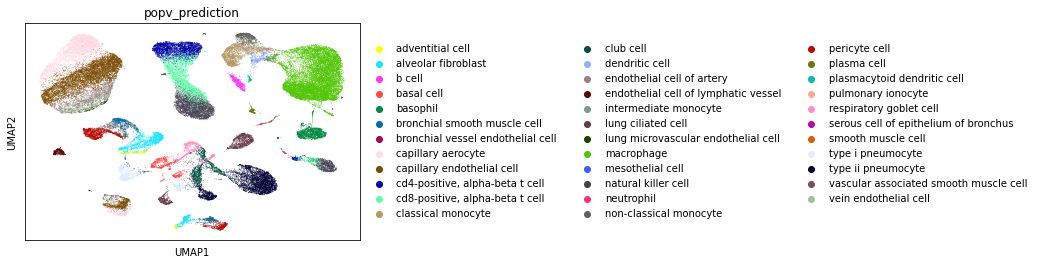

In [ ]:
sc.pl.umap(query_adata, color='popv_prediction')

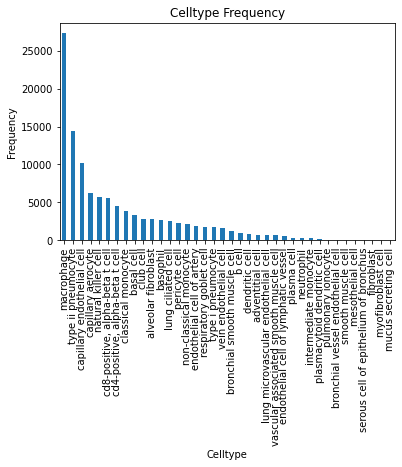

In [ ]:

ax  = adata.obs['popv_prediction'].value_counts().plot.bar()
ax.set_title('Celltype Frequency')
ax.set_xlabel('Celltype')
ax.set_ylabel('Frequency')
figpath = os.path.join(save_folder, "celltype_frequency.pdf")
ax.get_figure().savefig(figpath, bbox_inches='tight', dpi=300)



In [ ]:
from popv import make_agreement_plots

all_prediction_keys = [
        "popv_knn_on_bbknn_prediction",
        "popv_knn_on_scvi_online_prediction",
        "popv_knn_on_scvi_offline_prediction",
        "popv_scanvi_online_prediction",
        "popv_scanvi_offline_prediction",
        "popv_svm_prediction",
        "popv_rf_prediction",
        "popv_onclass_prediction",
        "popv_knn_on_scanorama_prediction",
    ]

obs_keys = query_adata.obs.keys()

pred_keys = [key for key in obs_keys if key in all_prediction_keys]


Making confusion matrix for popv_knn_on_bbknn_prediction
Making confusion matrix for popv_knn_on_scvi_offline_prediction
Making confusion matrix for popv_scanvi_offline_prediction
Making confusion matrix for popv_svm_prediction
Making confusion matrix for popv_rf_prediction
Making confusion matrix for popv_onclass_prediction
Making confusion matrix for popv_knn_on_scanorama_prediction


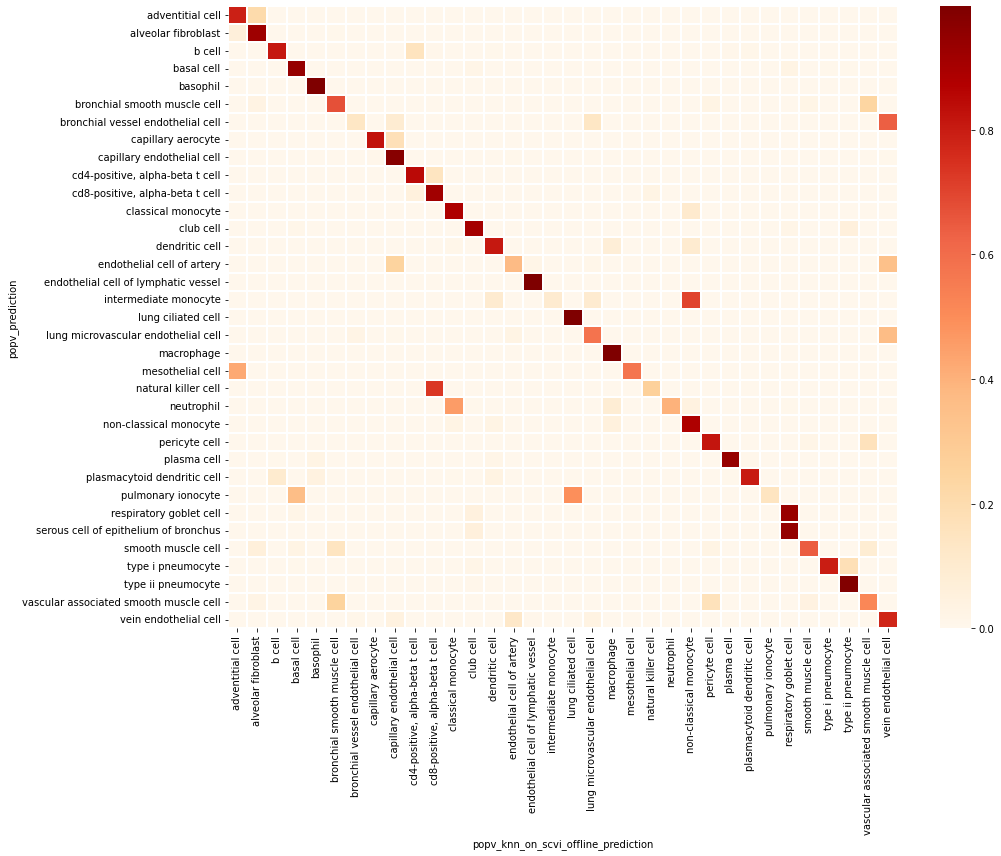

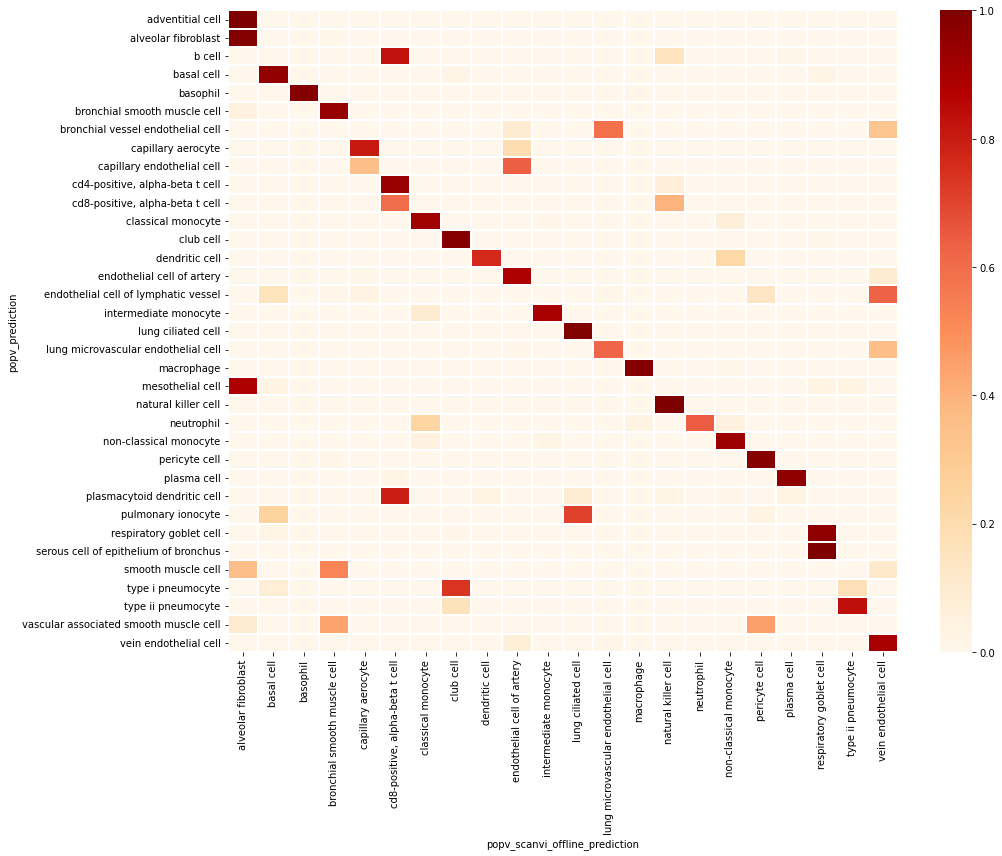

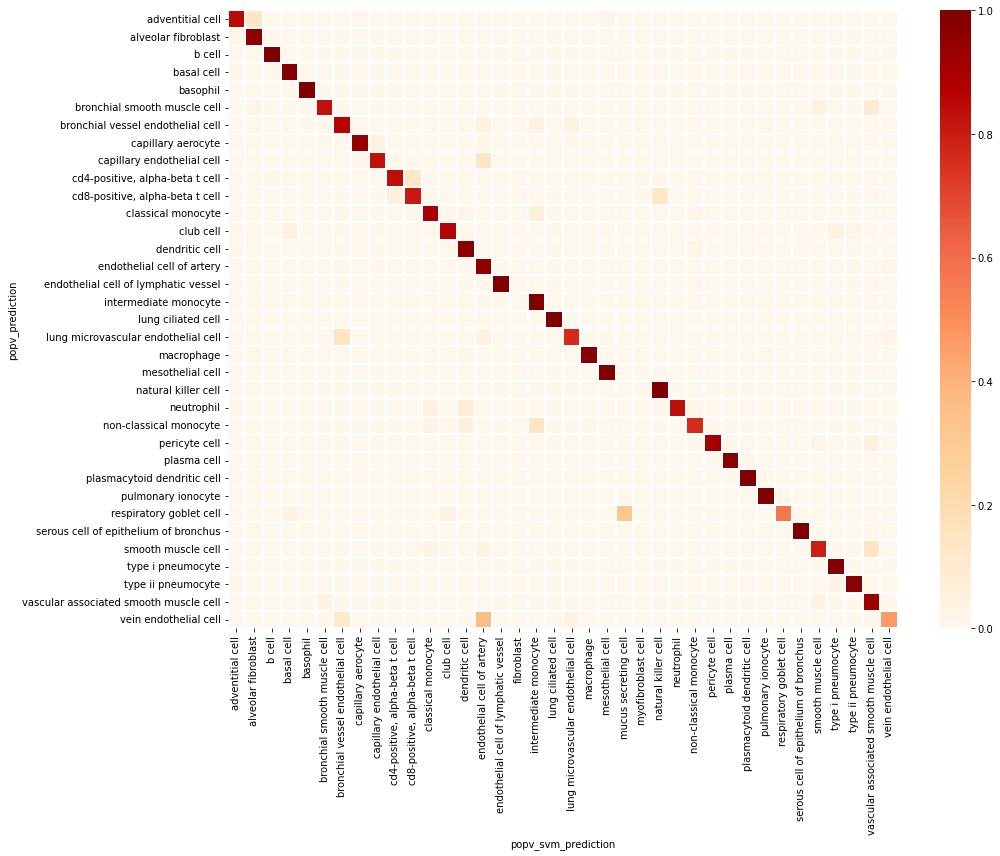

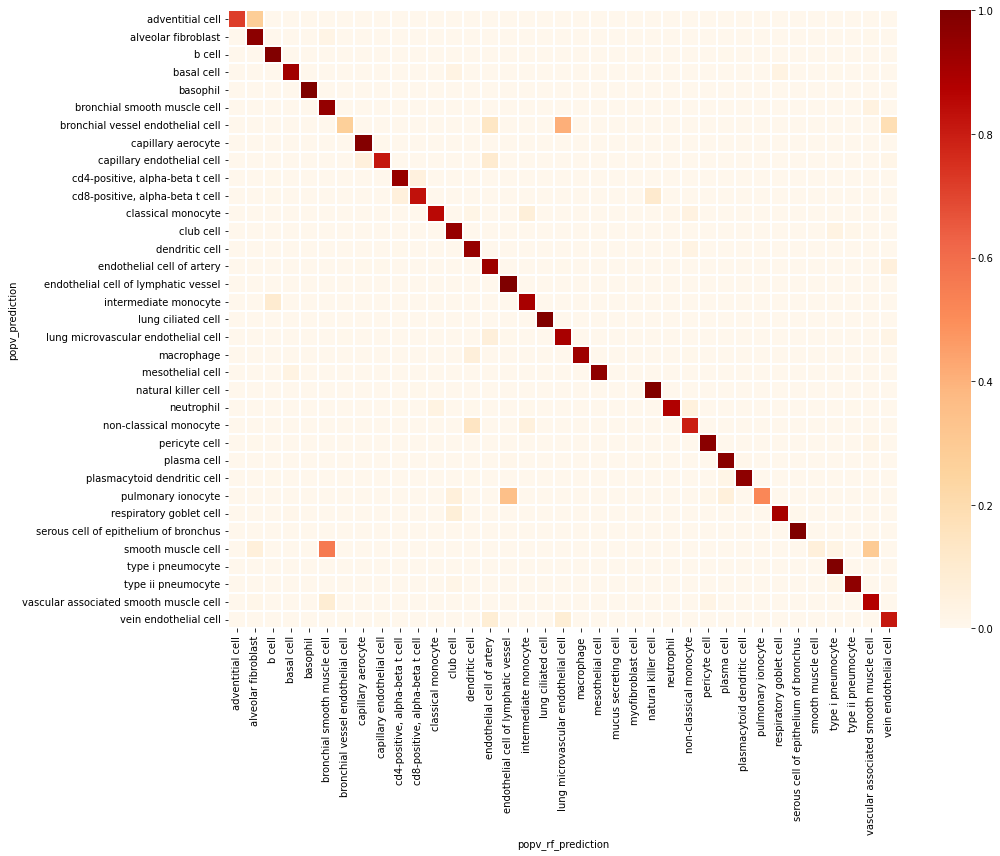

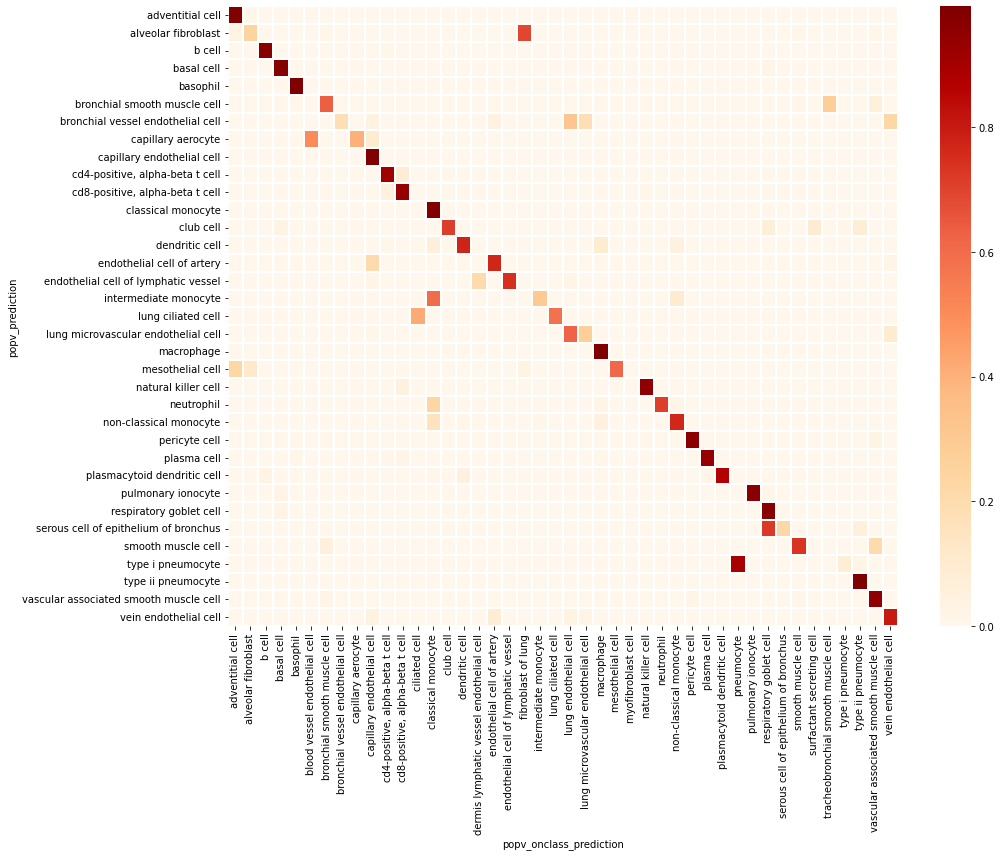

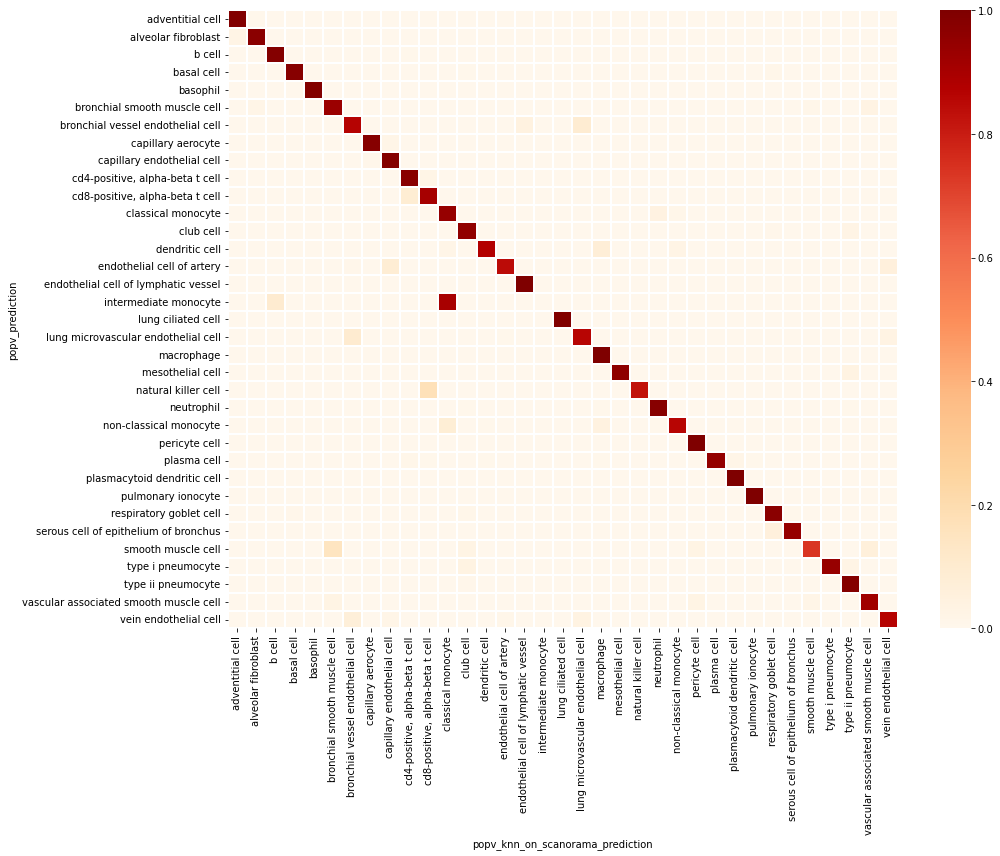

In [ ]:
make_agreement_plots(query_adata,
                     methods=pred_keys, 
                     popv_prediction_key = 'popv_prediction',
                     save_folder=save_folder)

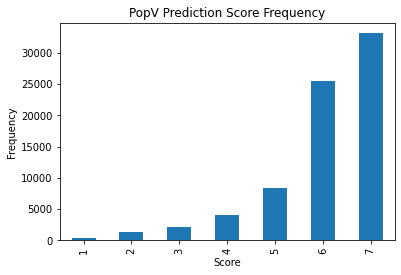

In [ ]:

ax = query_adata.obs['popv_prediction_score'].value_counts().sort_index().plot.bar()

ax.set_xlabel('Score')
ax.set_ylabel("Frequency")
ax.set_title("PopV Prediction Score Frequency")
figpath = os.path.join(save_folder, "prediction_score_barplot.pdf")
ax.get_figure().savefig(figpath, bbox_inches="tight", dpi=300)



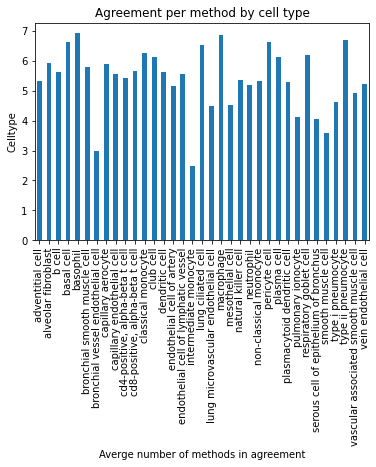

In [ ]:
ax = query_adata.obs.groupby('popv_prediction')['popv_prediction_score'].mean().plot.bar()
ax.set_ylabel('Celltype')
ax.set_xlabel('Averge number of methods in agreement')
ax.set_title('Agreement per method by cell type')
figpath = os.path.join(save_folder, "percelltype_agreement_barplot.pdf")

ax.get_figure().savefig(figpath, bbox_inches='tight', dpi=300)